In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [4]:
X,y= load_iris(return_X_y=True)
data = load_iris()

In [5]:
df= pd.DataFrame(X,columns=[data.feature_names])

In [6]:
df['Species']=y

In [ ]:
df.head()

In [7]:
df.columns

MultiIndex([('sepal length (cm)',),
            ( 'sepal width (cm)',),
            ('petal length (cm)',),
            ( 'petal width (cm)',),
            (          'Species',)],
           )

In [29]:
df = df[df['Species'] != 0][[( 'sepal width (cm)',),
            ('petal length (cm)',),
            (          'Species',)]]

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.columns = ['SepalWidthCm','SW','PetalLengthCm','PW','Species']
df.head()

,SepalWidthCm,SW,PetalLengthCm,PW,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

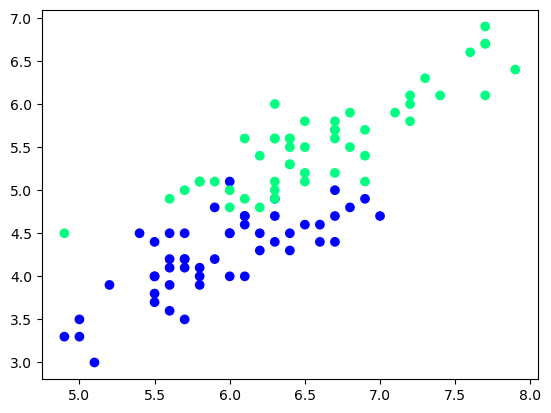

In [19]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [20]:
df.shape

(100, 3)

In [23]:
df.iloc[:60,:].sample(10)

,SepalWidthCm,PetalLengthCm,Species
106,4.9,4.5,2
77,6.7,5.0,1
84,5.4,4.5,1
105,7.6,6.6,2
60,5.0,3.5,1
81,5.5,3.7,1
70,5.9,4.8,1
91,6.1,4.6,1
103,6.3,5.6,2
67,5.8,4.1,1


In [22]:
df.iloc[:60,:].sample(10)

,SepalWidthCm,PetalLengthCm,Species
81,5.5,3.7,1
95,5.7,4.2,1
97,6.2,4.3,1
84,5.4,4.5,1
96,5.7,4.2,1
100,6.3,6.0,2
74,6.4,4.3,1
53,5.5,4.0,1
59,5.2,3.9,1
101,5.8,5.1,2


In [25]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
98,5.1,3.0,1
56,6.3,4.7,1
63,6.1,4.7,1
67,5.8,4.1,1
85,6.0,4.5,1
105,7.6,6.6,2
61,5.9,4.2,1
60,5.0,3.5,1
71,6.1,4.0,1
109,7.2,6.1,2


In [28]:
dfs = df.sample(100)

In [32]:
dfs_train = dfs.iloc[:60,:].sample(10)
dfs_test = dfs.iloc[60:80,:].sample(5)
dfs_val = dfs.iloc[80:,:].sample(5)

In [33]:
dfs_train

,SepalWidthCm,PetalLengthCm,Species
100,6.3,6.0,2
118,7.7,6.9,2
106,4.9,4.5,2
61,5.9,4.2,1
116,6.5,5.5,2
99,5.7,4.1,1
96,5.7,4.2,1
65,6.7,4.4,1
135,7.7,6.1,2
66,5.6,4.5,1


In [34]:
dfs_test

,SepalWidthCm,PetalLengthCm,Species
64,5.6,3.6,1
79,5.7,3.5,1
88,5.6,4.1,1
86,6.7,4.7,1
78,6.0,4.5,1


In [35]:
dfs_val

,SepalWidthCm,PetalLengthCm,Species
121,5.6,4.9,2
123,6.3,4.9,2
80,5.5,3.8,1
70,5.9,4.8,1
124,6.7,5.7,2


In [43]:
X_test = dfs_val.iloc[:,:-1].values
y_test = dfs_val.iloc[-1].values
X_test

array([[5.6, 4.9],
       [6.3, 4.9],
       [5.5, 3.8],
       [5.9, 4.8],
       [6.7, 5.7]])

In [44]:
y_test

array([6.7, 5.7, 2. ])

# Case 1 Bagging

In [53]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [54]:
df_bag  = dfs_train.sample(10)
X = df_bag.iloc[:,:-1]
y = df_bag.iloc[:,-1]

In [55]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [60]:
y.shape

(10,)

In [56]:
clf1 = DecisionTreeClassifier()

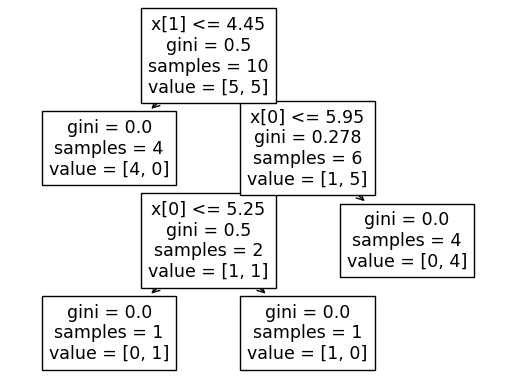

C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [3, 5]

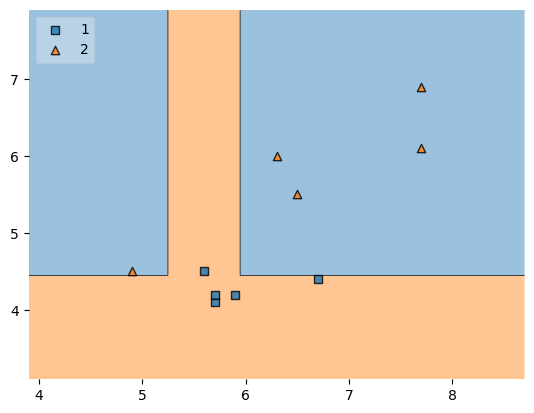

In [57]:
evaluate(clf1,X,y)

In [61]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag


,SepalWidthCm,PetalLengthCm,Species
56,6.3,4.7,1
85,6.0,4.5,1
60,5.0,3.5,1
98,5.1,3.0,1
85,6.0,4.5,1
105,7.6,6.6,2
60,5.0,3.5,1
56,6.3,4.7,1


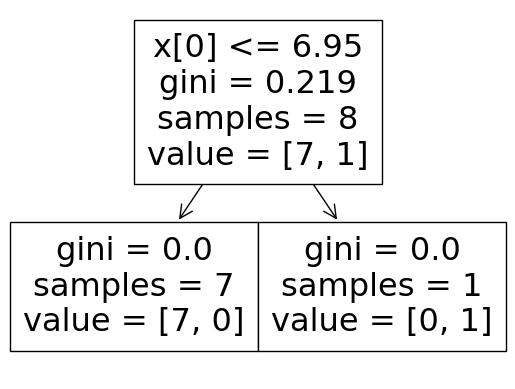

C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [3, 5]

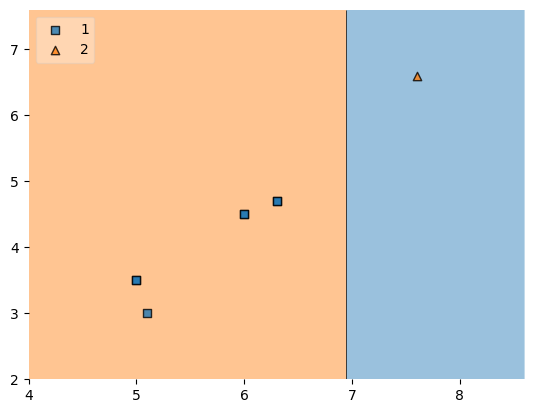

In [62]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [63]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
98,5.1,3.0,1
105,7.6,6.6,2
60,5.0,3.5,1
56,6.3,4.7,1
85,6.0,4.5,1
98,5.1,3.0,1
85,6.0,4.5,1
105,7.6,6.6,2


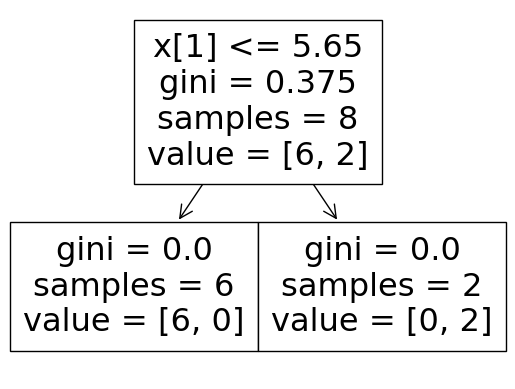

C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [3, 5]

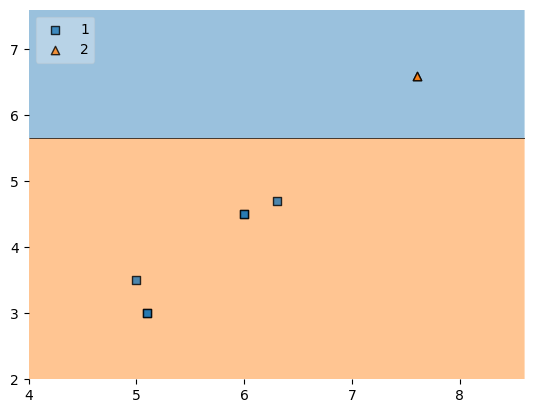

In [64]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)